In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/online retail csv.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
# Calculate total sales for each row
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by country and calculate total sales per country
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Display top countries by total sales
print(sales_by_country.head(10))

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalSales, dtype: float64


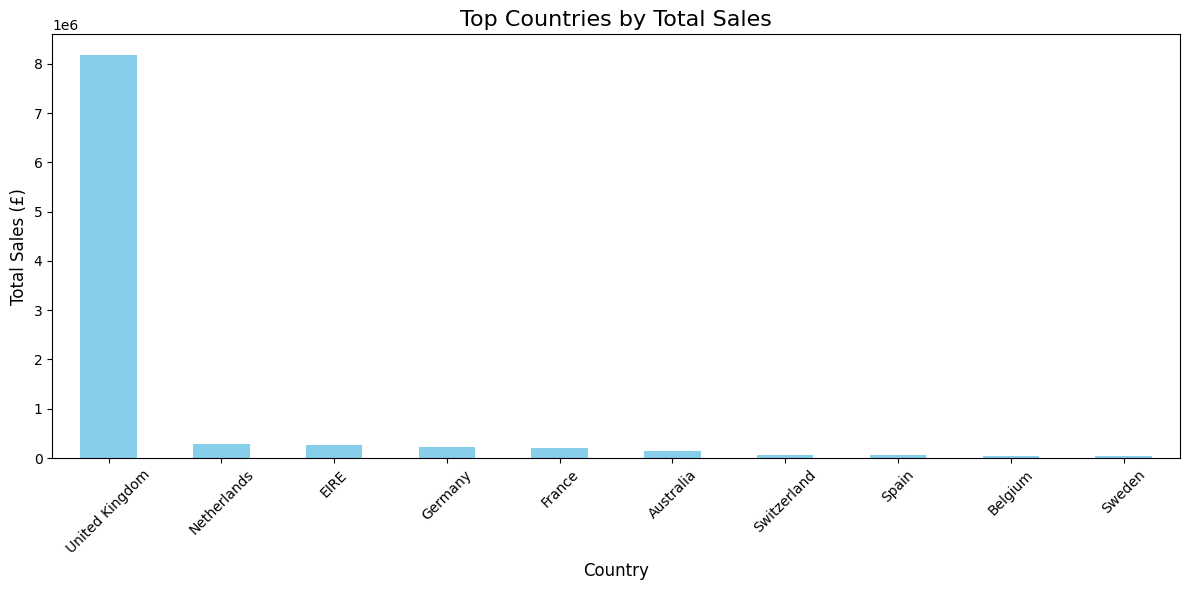

In [ ]:

# Visualization of top countries' total sales
top_countries = sales_by_country.head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Countries by Total Sales', fontsize=16)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Group by product and sum the quantity sold
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort by Quantity_Sold in descending order
most_sold = product_sales.sort_values(by='Quantity', ascending=False)

# Display the top 10 most sold products
most_sold.head(10)

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

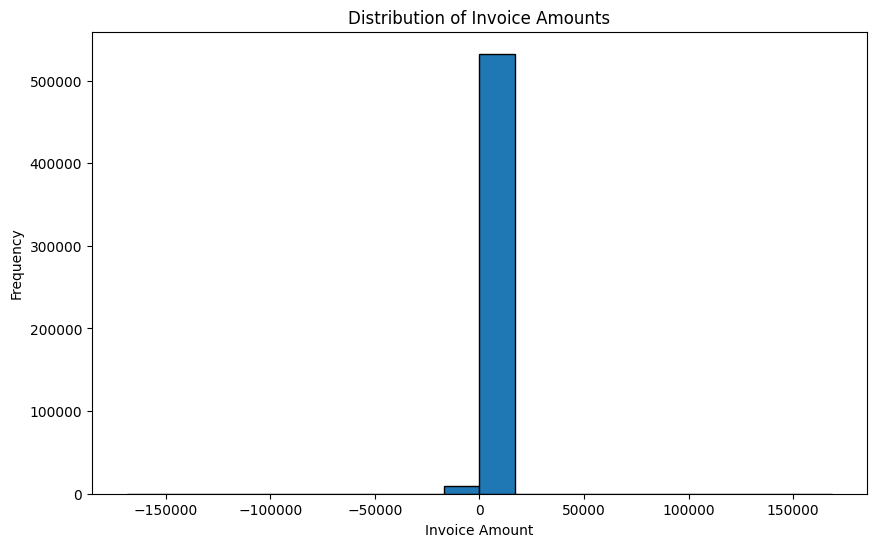

In [ ]:
# Plotting histogram of invoice amounts
plt.figure(figsize=(10, 6))
plt.hist(df['TotalSales'], bins=20, edgecolor='black')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Invoice Amounts')
plt.show()

In [ ]:
# Calculate Range: difference between max and min invoice amount
invoice_range = df['TotalSales'].max() - df['TotalSales'].min()

# Calculate Variance: spread from the mean
invoice_variance = df['TotalSales'].var()

# Calculate Standard Deviation: how much data points deviate from the mean
invoice_std_dev = df['TotalSales'].std()

print(f'Range: {invoice_range}')
print(f'Variance: {invoice_variance}')
print(f'Standard Deviation: {invoice_std_dev}')

Range: 336939.2
Variance: 143497.64000540902
Standard Deviation: 378.81082350615196


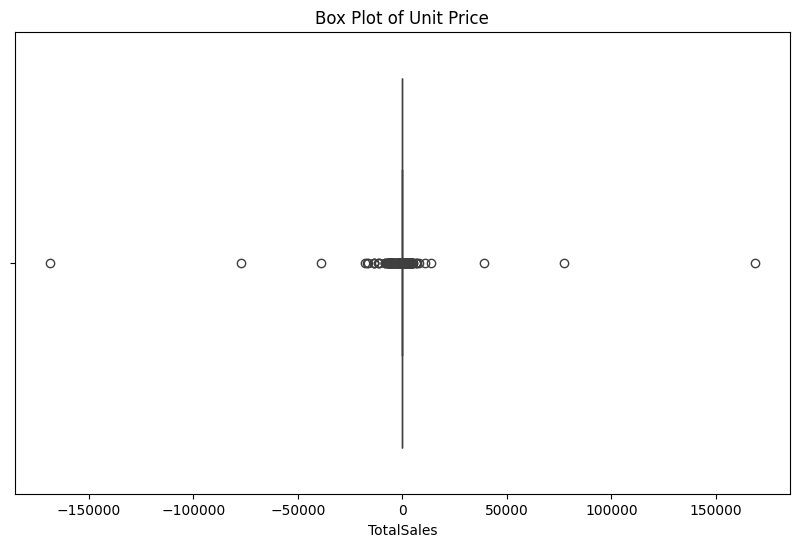

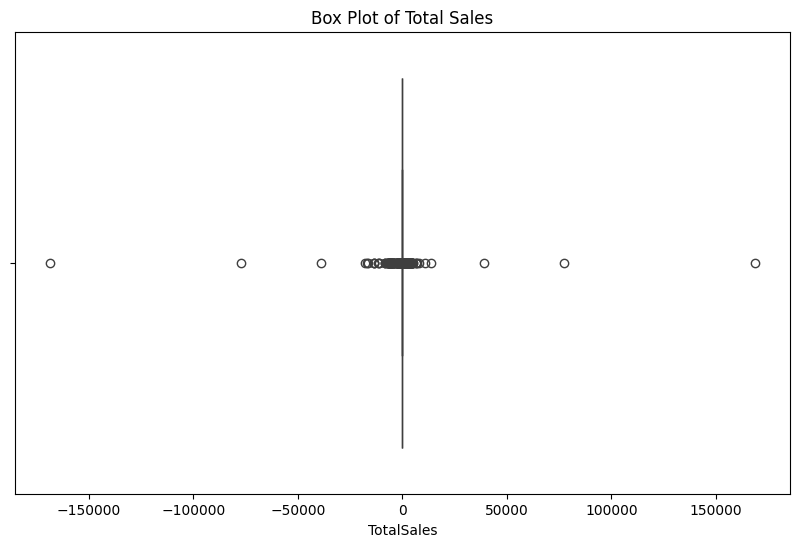

In [ ]:
import seaborn as sns

# Box plot for Unit Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalSales'])
plt.title('Box Plot of Unit Price')
plt.show()

# Box plot for Total Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalSales'])
plt.title('Box Plot of Total Sales')
plt.show()

In [ ]:
# Calculate quantiles for outlier removal (TotalSales - assumed to represent Unit Price and Total Sales)
Q1 = df['TotalSales'].quantile(0.25)
Q3 = df['TotalSales'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier removal
lower_bound_unit_price = Q1 - 1.5 * IQR
upper_bound_unit_price = Q3 + 1.5 * IQR
lower_bound_total_sales = Q1 - 1.5 * IQR
upper_bound_total_sales = Q3 + 1.5 * IQR

# If you remove outliers based on IQR
df_clean = df[(df['TotalSales'] >= lower_bound_unit_price) & (df['TotalSales'] <= upper_bound_unit_price)]
df_clean = df_clean[(df_clean['TotalSales'] >= lower_bound_total_sales) & (df_clean['TotalSales'] <= upper_bound_total_sales)]

# If you cap the outliers using quantiles (e.g., upper and lower 1st and 99th percentile bounds)
df['TotalSales'] = df['TotalSales'].clip(lower=df['TotalSales'].quantile(0.01), upper=df['TotalSales'].quantile(0.99))
df['TotalSales'] = df['TotalSales'].clip(lower=df['TotalSales'].quantile(0.01), upper=df['TotalSales'].quantile(0.99))

# Show cleaned data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


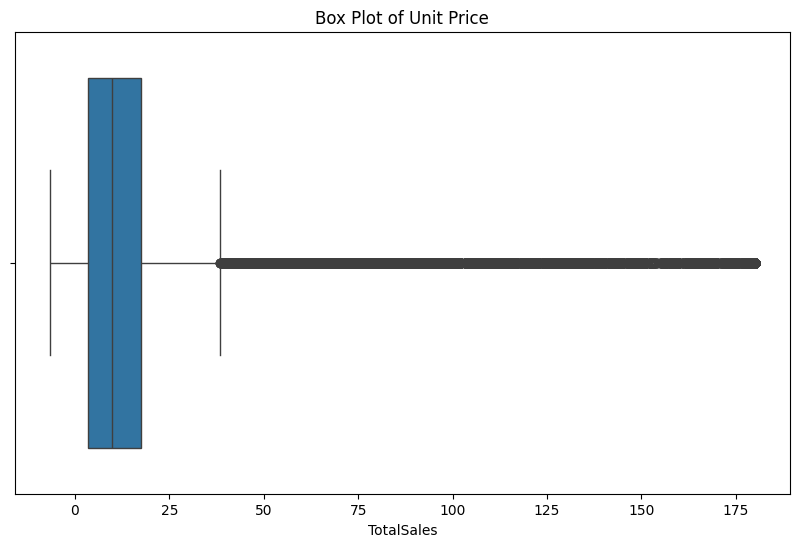

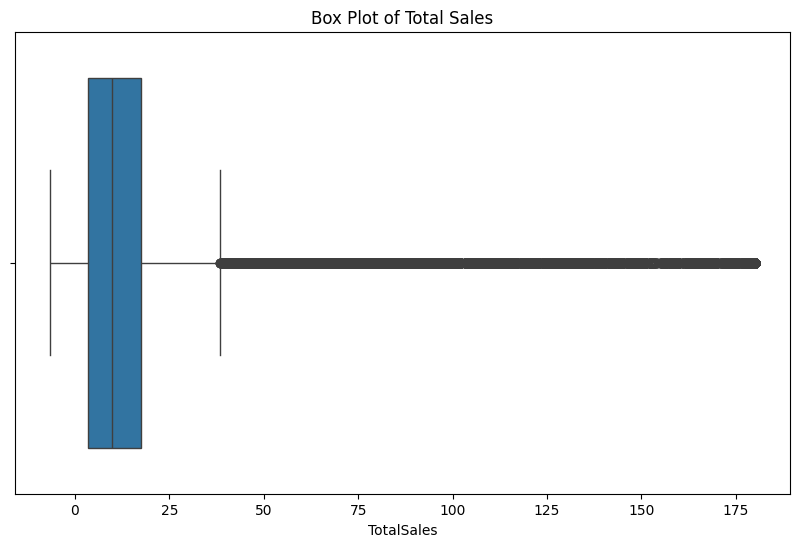

In [ ]:
# Box plot for Unit Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalSales'])
plt.title('Box Plot of Unit Price')
plt.show()

# Box plot for Total Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalSales'])
plt.title('Box Plot of Total Sales')
plt.show()

In [ ]:
# Assuming 'CustomerID' is the customer identifier column and 'TotalSales' represents the revenue generated per sale
# Group the data by CustomerID and sum the TotalSales (or UnitPrice * Quantity) per customer
top_customers = df.groupby('CustomerID')['TotalSales'].sum()

# Sort customers by revenue in descending order
top_customers_sorted = top_customers.sort_values(ascending=False)

# Show top N customers by revenue (e.g., top 10 customers)
top_10_customers = top_customers_sorted.head(10)

# Display the top 10 customers with the most revenue
print(top_10_customers)

CustomerID
14646.0    218554.44
14911.0    134732.05
12415.0     83472.51
17511.0     82566.15
14156.0     80164.77
18102.0     64915.78
15311.0     59476.98
13089.0     56548.30
13694.0     55566.14
14096.0     55186.05
Name: TotalSales, dtype: float64


In [ ]:
# Step 1: Remove rows with missing 'CustomerID'
df = df.dropna(subset=['CustomerID'])

# Step 2: Filter out invalid transactions (negative or zero Quantity or UnitPrice)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Step 3: Convert 'InvoiceDate' column to datetime format, handle missing dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Drop rows where 'InvoiceDate' is null after conversion
df = df.dropna(subset=['InvoiceDate'])

# Display the cleaned dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
import pandas as pd

# Step 1: Convert 'InvoiceDate' to datetime format (if not already done)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Step 2: Compute Recency, Frequency, and Monetary (RFM) values for each customer

# Recency: Days since last purchase
max_date = df['InvoiceDate'].max()  # Find the most recent date in the data
df['Recency'] = (max_date - df['InvoiceDate']).dt.days  # Calculate recency as days since last purchase

# Frequency: Total number of purchases per customer
frequency = df.groupby('CustomerID')['InvoiceDate'].count()  # Count the number of purchases per customer

# Monetary: Total spending per customer
monetary = df.groupby('CustomerID')['TotalSales'].sum()  # Sum up total sales per customer

# Merge these metrics into a single DataFrame for each customer
rfm = pd.DataFrame({
    'Recency': df.groupby('CustomerID')['Recency'].min(),  # Min recency is used since customers may have multiple records
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()

# Display the RFM DataFrame
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12347.0,95,106,2470.69
1,12348.0,220,5,367.00
2,12350.0,311,17,334.40
3,12352.0,274,23,996.08
4,12355.0,96,13,459.40


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Normalize the RFM features (Recency, Frequency, Monetary)
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert the scaled values into a DataFrame for easier readability
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Optional: Concatenate the normalized features with the original 'CustomerID'
rfm_scaled_df['CustomerID'] = rfm['CustomerID']

# Display the normalized RFM data
rfm_scaled_df.head()

,Recency,Frequency,Monetary,CustomerID
0,-0.423848,0.430334,0.529385,12347.0
1,0.468278,-0.443601,-0.254039,12348.0
2,1.117745,-0.339767,-0.266179,12350.0
3,0.853676,-0.287850,-0.019766,12352.0
4,-0.416711,-0.374378,-0.219628,12355.0


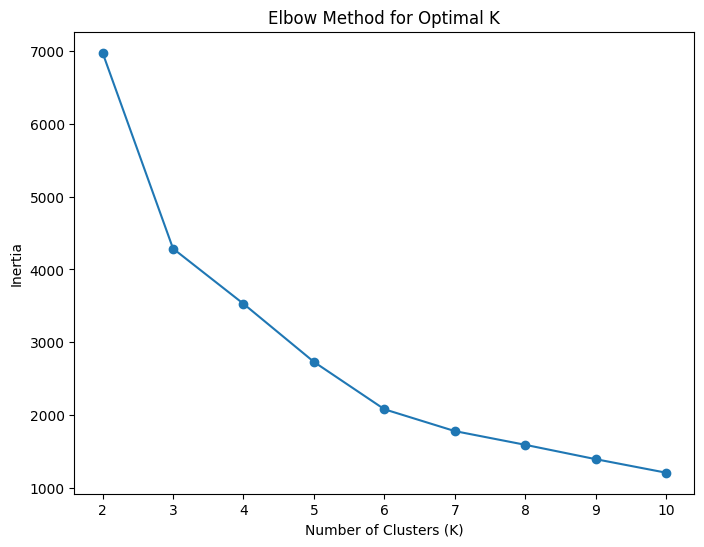

Silhouette Score: 0.4450


,Recency,Frequency,Monetary
0,-0.495575,0.048190,0.012390
1,1.242793,-0.267660,-0.244518
2,-0.987672,19.706668,9.088487
3,-0.783078,3.244234,9.811680


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Choose the number of clusters (K) using the Elbow Method

# Create a range of K values (e.g., from 2 to 10 clusters)
k_values = list(range(2, 11))
inertia = []

# Fit K-means for different values of K and compute the inertia (within-cluster sum of squares)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Step 2: Select the optimal number of clusters (K) and apply K-means clustering

# For the sake of this example, let's choose K = 4 based on the elbow plot
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

# Step 3: Evaluate the clustering quality using Silhouette Score
sil_score = silhouette_score(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']], rfm_scaled_df['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

# Display the clusters with corresponding customer information
rfm_scaled_df['CustomerID'] = rfm['CustomerID']
rfm_scaled_df.head()

# Optionally, display cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])
cluster_centers


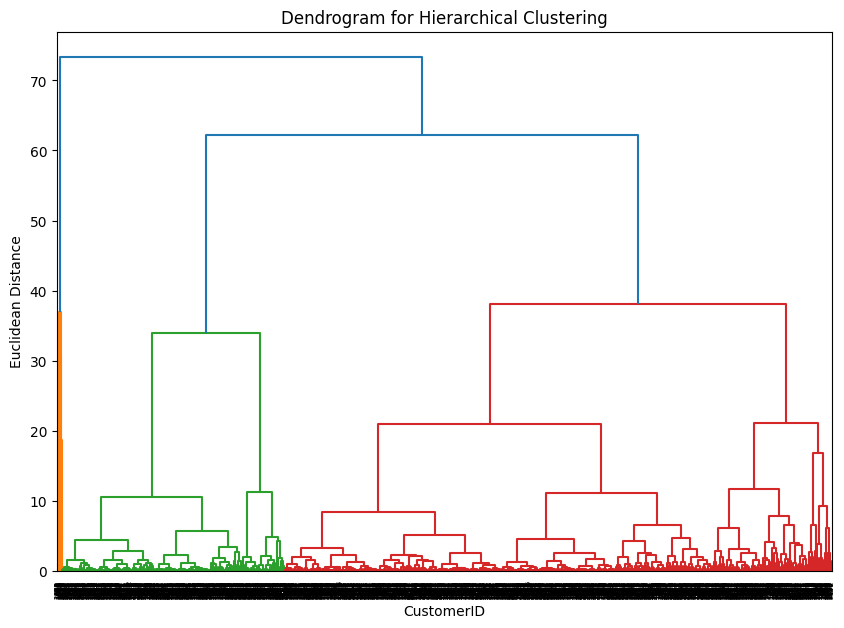

,Recency,Frequency,Monetary
Cluster,,,
0,-0.838152,6.864143,9.251095
1,-0.726302,0.892452,0.689807
2,1.236541,-0.272040,-0.240076
3,-0.432046,-0.189312,-0.178482


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# Step 1: Calculate the linkage matrix (distance matrix)
linkage_matrix = sch.linkage(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']], method='ward')

# Step 2: Plot the Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('CustomerID')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 3: Perform Agglomerative Clustering
# Cut the dendrogram to form clusters, for example, by specifying 4 clusters
agglo = AgglomerativeClustering(n_clusters=4,linkage='ward')

# Add cluster labels to the RFM data
rfm_scaled_df['Cluster'] = agglo.fit_predict(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

# Display the first few rows of the clustering results
rfm_scaled_df.head()

# Optional: Examine cluster centroids (for insight into each cluster)
# Centroid-like structure can be approximated by averaging the RFM features per cluster
cluster_centroids = rfm_scaled_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_centroids


Cluster
 0    2943
-1      54
Name: count, dtype: int64


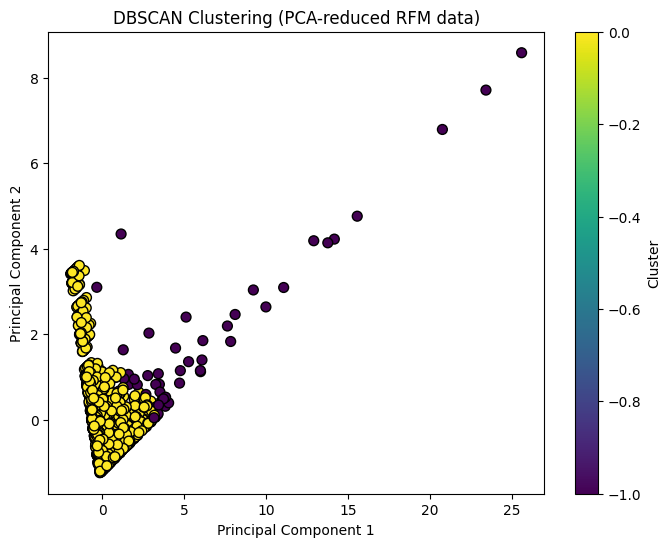

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Apply DBSCAN clustering on the normalized RFM features
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Set eps and min_samples based on your dataset
rfm_scaled_df['Cluster'] = dbscan.fit_predict(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

# Step 2: Analyze results
# -1 indicates noise (outliers)
print(rfm_scaled_df['Cluster'].value_counts())

# Display the clustering results
rfm_scaled_df.head()

# Optional: Visualize the clusters with a 2D plot (use dimensionality reduction for better visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Reduce dimensionality for visualization (2D)
rfm_pca = pca.fit_transform(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm_scaled_df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering (PCA-reduced RFM data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Evaluate Clustering - K-Means
kmeans_silhouette = silhouette_score(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']], rfm_scaled_df['Cluster'])
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")

# Evaluate Clustering - Hierarchical (Agglomerative Clustering)
agglo_silhouette = silhouette_score(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']], rfm_scaled_df['Cluster'])
print(f"Hierarchical Silhouette Score: {agglo_silhouette:.4f}")

# Evaluate Clustering - DBSCAN
# DBSCAN assigns -1 to noise points, we exclude these for Silhouette Score
dbscan_silhouette = silhouette_score(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']], rfm_scaled_df['Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

# Visualize the clusters of each method (PCA-reduced data for visualization)
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)

rfm_pca = pca.fit_transform(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

# Display cluster sizes for each method
print("Cluster Sizes for K-Means: \n", rfm_scaled_df['Cluster'].value_counts())
print("Cluster Sizes for DBSCAN: \n", rfm_scaled_df['Cluster'].value_counts())
print("Cluster Sizes for Hierarchical: \n", rfm_scaled_df['Cluster'].value_counts())

K-means Silhouette Score: 0.7927
Hierarchical Silhouette Score: 0.7927
DBSCAN Silhouette Score: 0.7927
Cluster Sizes for K-Means: 
 Cluster
 0    2943
-1      54
Name: count, dtype: int64
Cluster Sizes for DBSCAN: 
 Cluster
 0    2943
-1      54
Name: count, dtype: int64
Cluster Sizes for Hierarchical: 
 Cluster
 0    2943
-1      54
Name: count, dtype: int64
